# Crear la clase  Target

## Ejercicio 1

Cree el archivo competencia_01.csv, usando el competencia_01_crudo.csv con una variable adicional llamada clase_ternaria, que contenga las categorías **CONTINUA, BAJA+1 y BAJA+2**

Ayudita
Para practicar el muy útil y necesario lenguaje **SQL**, vamos a utilizar una base de datos **OLAP** llamada **DuckDB**.

La documentación la puede encontrar [aquí](https://duckdb.org/docs/archive/0.8.1/sql/introduction) Procedemos a instalarla, esto se debe ejecutar una sola vez

In [1]:
%%bash
pip install duckdb
pip install jupysql
pip install duckdb-engine

Couldn't find program: 'bash'


In [2]:
%pip install duckdb jupysql duckdb-engine


Note: you may need to restart the kernel to use updated packages.


Configuramos el entorno de ejecución. Si ya tiene todo instalado, solo necesita ejecutar esta celda para empezar a usar **duckdb**

In [1]:

import duckdb
import pandas as pd

%load_ext sql
%config SqlMagic.autopandas = True
%config SqlMagic.feedback = False
%config SqlMagic.displaycon = False

%sql duckdb:///mi_base.duckdb


Y ya podemos usar **SQL** dentro de una notebook!

In [53]:
%%sql
select 'hola mundo'

,'hola mundo'
0,hola mundo


Para cargar el archivo `.csv` a una tabla pasando su ubicación a través de la variable `dataset_path`:

In [14]:
dataset_file = 'competencia_01_crudo.csv'

Paso el archivo csv a una tabla en duckdb

In [17]:
%%sql
ROLLBACK

,Success


In [18]:
%%sql
create or replace table competencia_01_crudo as
select *
from read_csv_auto("{{dataset_file}}")

,Success


Hagamos unas queries básicas para comprobar que todo esta funcionando bien.

In [19]:
%sql select * from competencia_01_crudo limit 5

,numero_de_cliente,foto_mes,active_quarter,cliente_vip,internet,cliente_edad,cliente_antiguedad,mrentabilidad,mrentabilidad_annual,mcomisiones,...,Visa_madelantodolares,Visa_fultimo_cierre,Visa_mpagado,Visa_mpagospesos,Visa_mpagosdolares,Visa_fechaalta,Visa_mconsumototal,Visa_cconsumos,Visa_cadelantosefectivo,Visa_mpagominimo
0,249221323,202101,1,0,0,46,93,3070.24,15691.10,1278.11,...,0.0,4,0.00,-20833.47,0.0,2814,6743.38,6,0,9559.95
1,249227600,202101,1,0,0,42,278,496.21,15321.80,418.97,...,0.0,11,13267.49,-9662.51,0.0,5541,9419.90,8,0,1900.26
2,249234235,202101,1,0,0,54,17,806.56,10549.80,174.26,...,0.0,4,0.00,-4692.00,0.0,577,2821.32,2,0,6885.51
3,249244449,202101,1,0,0,61,290,27485.71,65621.74,23590.68,...,0.0,25,23800.17,-20349.22,0.0,7916,23509.71,8,0,1219.92
4,249244739,202101,1,0,0,66,320,3306.82,48787.99,3274.95,...,0.0,4,0.00,-88178.37,0.0,1958,20397.54,8,0,2627.52


In [20]:
%%sql
select
    foto_mes
    , count(*) as cantidad -- cuenta cuantos casos hay en cada foto_mes
                           -- y lo guarda en un campo llamado cantidad
from competencia_01_crudo
group by foto_mes

,foto_mes,cantidad
0,202101,161527
1,202102,162155
2,202103,163109
3,202104,163418
4,202105,163917
5,202106,164313


Perfecto, ahora cree una nueva tabla con la variable adicional que se le pide.

In [22]:
%%sql
create or replace table competencia_01 as (
    select numero_de_cliente,
           foto_mes,
           case when foto_mes_1 is null then 'BAJA+1'
                when foto_mes_2 is null then 'BAJA+2'
                else 'CONTINUA'
           end as target
    from (
        select numero_de_cliente,
               foto_mes,
               LEAD(foto_mes, 1, NULL) OVER (PARTITION BY numero_de_cliente ORDER BY foto_mes) foto_mes_1,
               LEAD(foto_mes, 2, NULL) OVER (PARTITION BY numero_de_cliente ORDER BY foto_mes) foto_mes_2
        from competencia_01_crudo
    ) as a
    where foto_mes <= 202104
)


,Success


In [23]:
%sql select * from competencia_01 limit 50

,numero_de_cliente,foto_mes,target
0,249255747,202101,CONTINUA
1,249255747,202102,CONTINUA
2,249255747,202103,CONTINUA
3,249255747,202104,CONTINUA
4,249366814,202101,CONTINUA
5,249366814,202102,CONTINUA
6,249366814,202103,CONTINUA
7,249366814,202104,CONTINUA
8,249502827,202101,CONTINUA
9,249502827,202102,CONTINUA


## Ejercicio 1.1
* ¿Cuál es la nominalidad de cada clase?


In [24]:
%%sql
PIVOT competencia_01
on target
USING count(numero_de_cliente)
GROUP BY foto_mes

,foto_mes,BAJA+1,BAJA+2,CONTINUA
0,202101,616,824,160087
1,202102,830,1027,160298
2,202103,1034,953,161122
3,202104,954,1131,161333


In [59]:
%%sql
# Quiero chequear por datos duplicados
select numero_de_cliente, count(*) as cantidad
from competencia_01
group by numero_de_cliente
having cantidad > 3

,numero_de_cliente,cantidad
0,257834302,4
1,258713442,4
2,259190019,4
3,261491162,4
4,261690983,4
...,...,...
159051,630876366,4
159052,630911952,4
159053,631530151,4
159054,632619395,4


Se bajan por mes entre el 0.4% y el 0.6% de los clientes

In [26]:
%%sql
SELECT
    foto_mes,
    SUM(CASE WHEN target = 'BAJA+1' THEN 1 ELSE 0 END) AS baja_1,
    SUM(CASE WHEN target = 'BAJA+2' THEN 1 ELSE 0 END) AS baja_2,
    SUM(CASE WHEN target = 'CONTINUA' THEN 1 ELSE 0 END) AS continua,
    COUNT(*) AS total_clientes,
    ROUND(100.0 * SUM(CASE WHEN target = 'BAJA+1' THEN 1 ELSE 0 END) / COUNT(*), 2) AS pct_baja_1,
    ROUND(100.0 * SUM(CASE WHEN target = 'BAJA+2' THEN 1 ELSE 0 END) / COUNT(*), 2) AS pct_baja_2
FROM competencia_01
GROUP BY foto_mes

,foto_mes,baja_1,baja_2,continua,total_clientes,pct_baja_1,pct_baja_2
0,202101,616.0,824.0,160087.0,161527,0.38,0.51
1,202102,830.0,1027.0,160298.0,162155,0.51,0.63
2,202103,1034.0,953.0,161122.0,163109,0.63,0.58
3,202104,954.0,1131.0,161333.0,163418,0.58,0.69


Analisis de los clientes que se bajan, que antiguedad tienen vs los clientes que siguen?

In [29]:
%%sql
create or replace table competencia_02 as (
    select a.*, b.target
    from competencia_01_crudo a
    left join competencia_01 b
    using (numero_de_cliente, foto_mes)
    where a.foto_mes <= 202104 
)

,Success


In [32]:
%%sql
PIVOT competencia_02
ON target
USING ROUND(AVG(cliente_antiguedad)/12, 1) AS antiguedad_anios
GROUP BY foto_mes


,foto_mes,BAJA+1_antiguedad_anios,BAJA+2_antiguedad_anios,CONTINUA_antiguedad_anios
0,202101,8.8,8.5,11.1
1,202102,8.6,9.5,11.1
2,202103,9.5,9.3,11.2
3,202104,9.4,9.0,11.2


In [33]:
%sql COPY competencia_02 TO 'competencia_02.csv' (FORMAT CSV, HEADER)

,Success


# Analisis Descriptivo

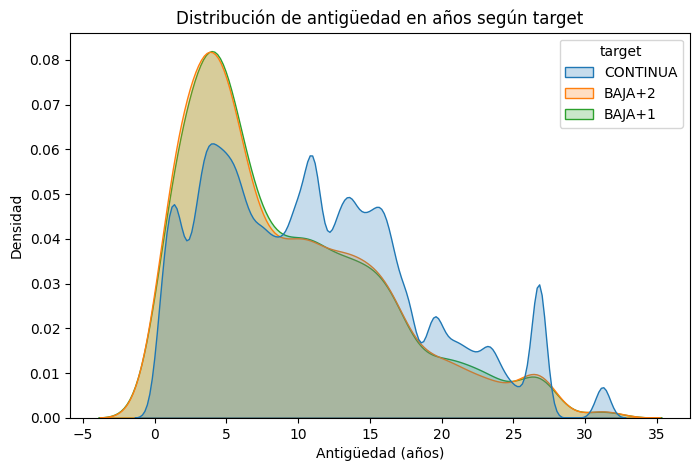

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('competencia_02.csv')
# paso a años
df["antiguedad_anios"] = df["cliente_antiguedad"] / 12

plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="antiguedad_anios", hue="target", common_norm=False, fill=True)
plt.title("Distribución de antigüedad en años según target")
plt.xlabel("Antigüedad (años)")
plt.ylabel("Densidad")
plt.show()


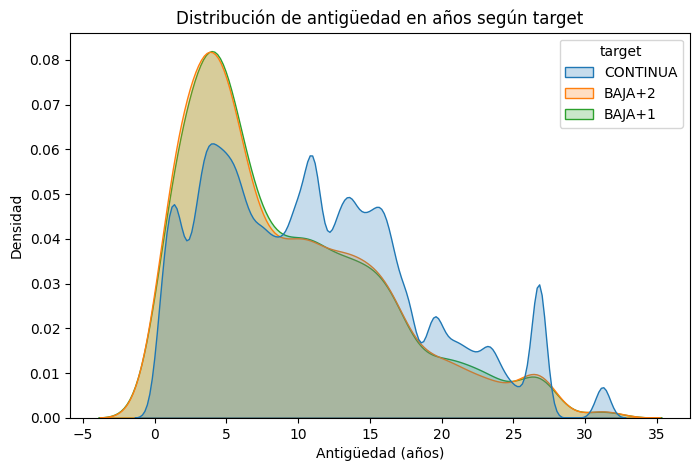

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('competencia_02.csv')
# paso a años
df["antiguedad_anios"] = df["cliente_antiguedad"] / 12

plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="antiguedad_anios", hue="target", common_norm=False, fill=True)
plt.title("Distribución de antigüedad en años según target")
plt.xlabel("Antigüedad (años)")
plt.ylabel("Densidad")
plt.show()


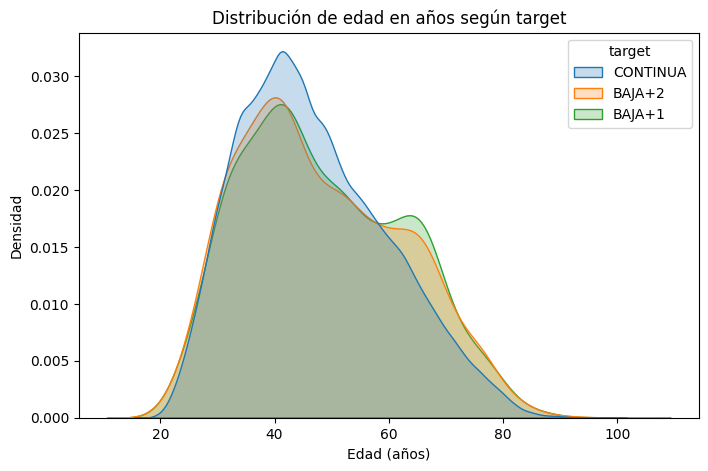

In [60]:
plt.figure(figsize=(8,5))
sns.kdeplot(data=df, x="cliente_edad", hue="target", common_norm=False, fill=True)
plt.title("Distribución de edad en años según target")
plt.xlabel("Edad (años)")
plt.ylabel("Densidad")
plt.show()

De los clientes que continuan, la enorme mayoria (>98.7%) estuvieron activos en el ultimo quarter. En cambio, de los que abandonan el 20% no fue activo

In [39]:
%%sql
PIVOT competencia_02
ON target
USING ROUND(AVG(active_quarter), 3)
GROUP BY foto_mes

,foto_mes,BAJA+1,BAJA+2,CONTINUA
0,202101,0.784,0.760,0.987
1,202102,0.769,0.813,0.988
2,202103,0.824,0.834,0.989
3,202104,0.831,0.833,0.989


Que % de los inactivos se dan de baja? 

In [43]:
%%sql
SELECT
    foto_mes,
    ROUND(100.0 * SUM(CASE WHEN target = 'BAJA+1' THEN 1 ELSE 0 END) 
          / COUNT(*), 2) AS pct_baja_1,
    ROUND(100.0 * SUM(CASE WHEN target = 'BAJA+2' THEN 1 ELSE 0 END) 
          / COUNT(*), 2) AS pct_baja_2,
    ROUND(100.0 * SUM(CASE WHEN target = 'CONTINUA' THEN 1 ELSE 0 END) 
          / COUNT(*), 2) AS pct_continua,
    pct_baja_1 + pct_baja_2 AS pct_total_bajas      
FROM competencia_02
WHERE active_quarter = 0   -- los inactivos
GROUP BY foto_mes
ORDER BY foto_mes;


,foto_mes,pct_baja_1,pct_baja_2,pct_continua,pct_total_bajas
0,202101,5.43,8.09,86.48,13.52
1,202102,8.28,8.28,83.43,16.56
2,202103,8.36,7.25,84.39,15.61
3,202104,7.79,9.14,83.07,16.93


active_quarter Es un buen indicador de cuando los clientes pueden irse. con que otros features correlaciona?


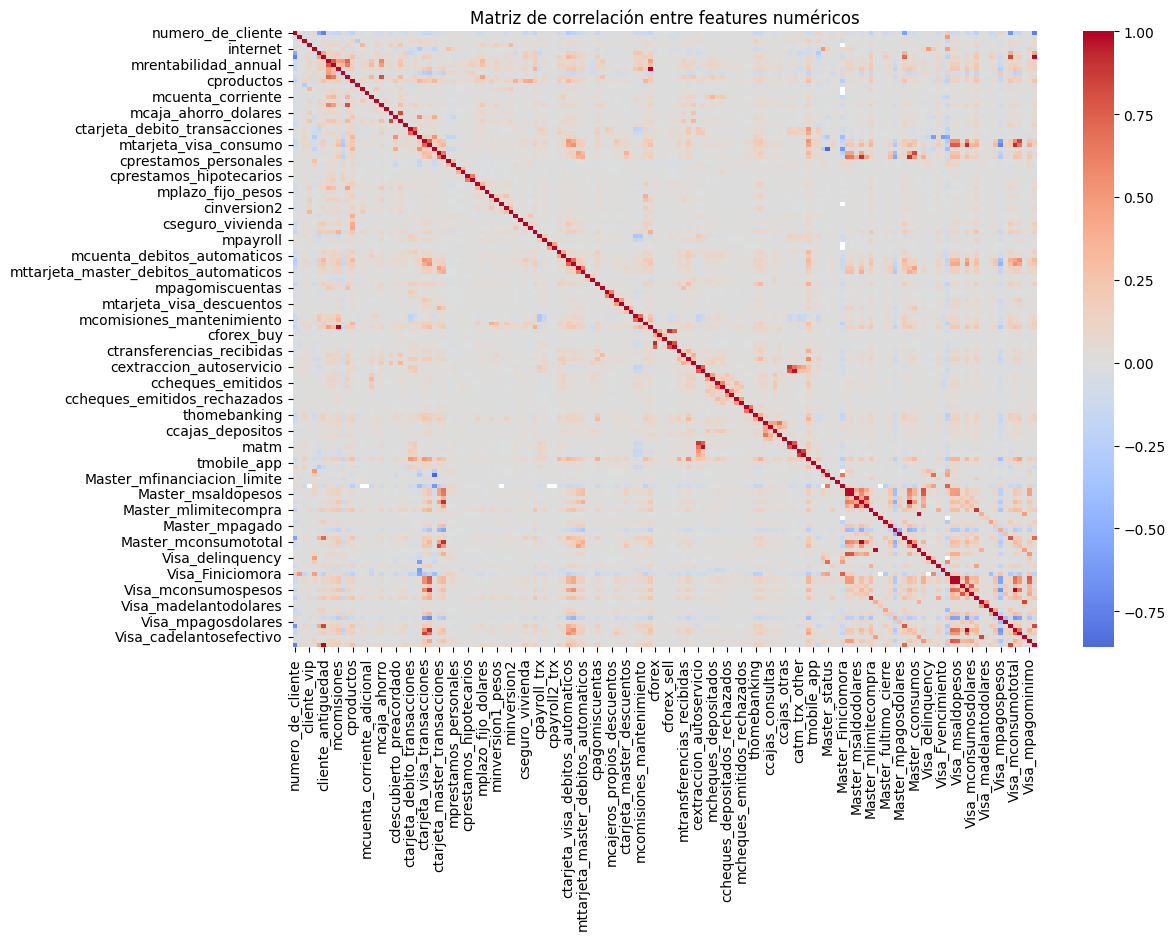

In [44]:
# Nos quedamos solo con numéricas
num_df = df.select_dtypes(include=["number"])

# Matriz de correlación
corr = num_df.corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=False)
plt.title("Matriz de correlación entre features numéricos")
plt.show()

In [47]:
import numpy as np

# Triángulo superior de la matriz para no repetir pares
corr_pairs = (
    corr.where(~np.tril(np.ones(corr.shape)).astype(bool))
    .stack()
    .reset_index()
    .rename(columns={"level_0":"var1", "level_1":"var2", 0:"correlacion"})
    .sort_values(by="correlacion", ascending=False)
)

# Top 50 pares más correlacionados
corr_pairs.head(50)

,var1,var2,correlacion
11829,Visa_mconsumospesos,Visa_mconsumototal,1.000000
11270,Master_mconsumospesos,Master_mconsumototal,1.000000
1055,cliente_antiguedad,antiguedad_anios,1.000000
1413,mcomisiones,mcomisiones_otras,0.998939
11772,Visa_msaldototal,Visa_msaldopesos,0.986574
11147,Master_msaldototal,Master_msaldopesos,0.980156
11374,Master_madelantopesos,Master_cadelantosefectivo,0.973417
9532,mextraccion_autoservicio,matm,0.967231
8771,cforex,cforex_sell,0.925778
4042,mtarjeta_visa_consumo,Visa_mconsumospesos,0.922842


In [ ]:
# Crear target binario (1 = baja, 0 = continua)
df["target_bin"] = df["target"].str.contains("BAJA").astype(int)

df['target_bin'].value_counts(normalize=True)


target_bin
0    642840
1      7369
Name: count, dtype: int64

In [52]:
# Correlación con target_bin
num_df = df.select_dtypes(include=["number"])
target_corr = num_df.corr()["target_bin"].sort_values(ascending=False)
target_corr

target_bin            1.000000
Master_Finiciomora    0.236255
Visa_Finiciomora      0.211516
Master_status         0.131803
Visa_status           0.124577
                        ...   
ctarjeta_master      -0.081332
cproductos           -0.086714
ctrx_quarter         -0.100976
ctarjeta_visa        -0.104317
active_quarter       -0.161926
Name: target_bin, Length: 156, dtype: float64

In [ ]:
%%sql
SELECT
    foto_mes,
    SUM(CASE WHEN target = 'BAJA+1' THEN 1 ELSE 0 END) AS baja_1,
    SUM(CASE WHEN target = 'BAJA+2' THEN 1 ELSE 0 END) AS baja_2,
    SUM(CASE WHEN target = 'CONTINUA' THEN 1 ELSE 0 END) AS continua,
    COUNT(*) AS total_clientes,
    ROUND(100.0 * SUM(CASE WHEN target = 'BAJA+1' THEN 1 ELSE 0 END) / COUNT(*), 2) AS pct_baja_1,
    ROUND(100.0 * SUM(CASE WHEN target = 'BAJA+2' THEN 1 ELSE 0 END) / COUNT(*), 2) AS pct_baja_2
FROM competencia_01
GROUP BY foto_mes

* ¿Cuál es la proporción del target?

## Guardar tabla en .csv

Para guardar a un `.csv` simplemente debe ejecutar la siguiente sentencia

In [25]:
%sql COPY competencia_01 TO 'competencia_01.csv' (FORMAT CSV, HEADER)

,Success
